In [1]:
from qiskit import QuantumCircuit

In [4]:



def inner_product(q: QuantumCircuit, a: str):
    revered_a = list(a)
    revered_a.reverse()
    q.barrier()
    for j in range(len(revered_a)):
        if revered_a[j] == '1':
            q.cx(j, len(a))
    return q


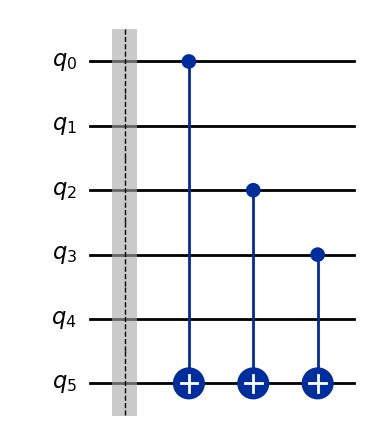

In [5]:
# Test
a = "01101"
n = len(a)
circuit = QuantumCircuit(n + 1, 0)
inner_product(circuit, a)
circuit.draw('mpl')

In [6]:
def h_all(q: QuantumCircuit):
    q.barrier()
    for j in range(q.num_qubits):
        q.h(j)


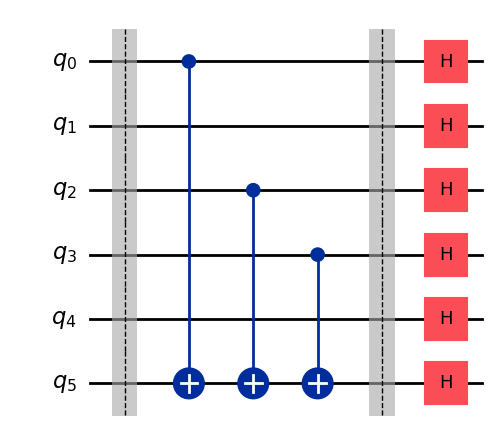

In [7]:
# Test
h_all(circuit)
circuit.draw('mpl')

In [9]:
def bernstein_vazirani(input: str):
    input_size = len(input)
    output_bit = input_size
    circuit = QuantumCircuit(input_size + 1, input_size)
    circuit.x(output_bit)
    h_all(circuit)
    inner_product(circuit, input)
    h_all(circuit)
    circuit.barrier()
    circuit.measure([ i for i in range(input_size)], [ j for j in range(input_size)])

    return circuit






In [10]:
# Test
circuit = bernstein_vazirani("0000101")
print(circuit)

           ░ ┌───┐ ░            ░ ┌───┐ ░ ┌─┐                  
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├─░─┤M├──────────────────
           ░ ├───┤ ░   │        ░ ├───┤ ░ └╥┘┌─┐               
q_1: ──────░─┤ H ├─░───┼────────░─┤ H ├─░──╫─┤M├───────────────
           ░ ├───┤ ░   │        ░ ├───┤ ░  ║ └╥┘┌─┐            
q_2: ──────░─┤ H ├─░───┼────■───░─┤ H ├─░──╫──╫─┤M├────────────
           ░ ├───┤ ░   │    │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐         
q_3: ──────░─┤ H ├─░───┼────┼───░─┤ H ├─░──╫──╫──╫─┤M├─────────
           ░ ├───┤ ░   │    │   ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐      
q_4: ──────░─┤ H ├─░───┼────┼───░─┤ H ├─░──╫──╫──╫──╫─┤M├──────
           ░ ├───┤ ░   │    │   ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐   
q_5: ──────░─┤ H ├─░───┼────┼───░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├───
           ░ ├───┤ ░   │    │   ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐
q_6: ──────░─┤ H ├─░───┼────┼───░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘
q_7: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░─┤ H ├─